In [1]:
%matplotlib inline

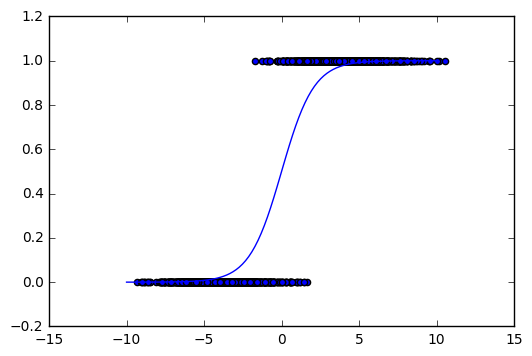

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(-(w[1] * X + w[0]))
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        # print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break

        prev_err = err
    
    w_val = sess.run(w, {X: xs, Y: ys})

all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(-(all_xs * w_val[1] + w_val[0])))
plt.show()